# Project 1


**Note: I was interested in exploring the data so I did some preliminary analysis, which turns out to be part Parts 2 and 3 asked for.**

I started with loading the file, and realized that using numpy's genfromtxt was a good method. I then calculated descriptive statistics for each column.



In [138]:
#Reading in the SAT data set.
#Importing the necessary libraries for data analysis.
import numpy as np
import csv
#importing scipy.stats for some of the statistical analysis.
import scipy.stats as stats
import urllib2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Setting code so that visualizations are plotted in Jupyter.
%matplotlib inline

#Mapping the url where the raw csv is. 
url = 'https://raw.githubusercontent.com/StampedPassp0rt/DSI-DC-1/master/week-01/project-01/assets/sat_scores.csv'
#Opening the URL
response = urllib2.urlopen(url)
#Using numpy and genfromtxt to construct file from csv 
#This code for some reason omits the header, but still allows me to subset by column.
#I think it is because 1) names = True states that the first row is the header row with the column names;
#2) dtype = None detects from the 2nd row on what the data is;
#3) dtype stores each column with the name of it, and then the type of data; and I can use the column names to
# subset the columns as individual arrays.
sat_csv = np.genfromtxt(response, dtype = None, names = True, delimiter = ",")
#Note: this creates an array of tuples. It would be nicer if it was a dataframe.



#Importing the CSV file into Python with the csv library.
#So far, I've used two methods to get the csv into Python.
with open("sat_scores.csv", "rb") as f:
    reader = csv.reader(f)
    sat_from_reader = list(reader)
    for row in reader:
        print row
        
#Note, I am not using the CSV reader data, I am using the data from numpy genfromtxt for the analysis.

#Just testing here that when I subset on the 'Rate' column, I get the column as a vector of the rates.
print sat_csv['Rate']
#Printing out a sample of the data set.
print sat_csv[0:5]

[82 81 79 77 72 71 71 69 69 68 67 65 65 63 60 57 56 55 54 53 53 52 51 51 34
 33 31 26 23 18 17 13 13 12 12 11 11  9  9  9  8  8  8  7  6  6  5  5  4  4
  4]
[('CT', 82, 509, 510) ('NJ', 81, 499, 513) ('MA', 79, 511, 515)
 ('NY', 77, 495, 505) ('NH', 72, 520, 516)]


Above, we loaded the data in for analysis. I tested two ways to do it: CSV, and numpy genfromtxt. I ultimately used numpy genfromtxt for a significant portion of the analysis.

In [4]:

#Describing the data.
#Slicing the Rate column out of the SAT CSV.
#I am first going to do descriptive stats for the whole sat_csv dataset.
#I will do these by column, first Rate, then Verbal, then Math.

#Participation "Rate" descriptive data. Using scipy.stats.describe for efficient output.
descriptive_stats_sat_Rate = stats.describe(sat_csv['Rate'])
print descriptive_stats_sat_Rate

#Calculating the mode
Rate_mode = stats.mode(sat_csv['Rate'])
#Calculating the standard deviation using the variance from stats.describe. This will give a different output than np.std.
#I am choosing to interpret this data set as a sample from a population of years of College Board data, hence why I am
# using the variance calculation from scipy.stats, which calculates the sample variance, instead of np.var, which calculates
# a whole population variance.
Rate_stdev = np.sqrt(descriptive_stats_sat_Rate[3])
#Median of Participation Rate
Rate_median = np.median(sat_csv['Rate'])


#Printing out the mean, median, and mode of Participation Rate.
print ("The mean and median of the Participation Rate are %f percent and %f percent, respectively." % (descriptive_stats_sat_Rate[2], Rate_median))
print ("The mode is %f percent, and its frequency is %f." % (Rate_mode[0], Rate_mode[1]))
print ("The variance and standard deviation of the Participation Rate are %f percent squared and %f percent respectively." % (descriptive_stats_sat_Rate[3], Rate_stdev))

#Printing out initial interpretation of Participation Rate data distribution.
print ("Since the kurtosis is %f, we know the distribution is flatter than a standard Gaussian distribution." % descriptive_stats_sat_Rate[5])
print ("Since the skewness is %f, we know the distribution is skewed right, with a long tail. So there are a series of states with higher participation rates than would be expected with a standard normal distribution." % descriptive_stats_sat_Rate[4])

#Participation Rate Descriptive Data - min and max values
print ("The minimum participation rate is %f percent and the maximum is %f percent." % (descriptive_stats_sat_Rate[1][0], descriptive_stats_sat_Rate[1][1]))
#Creating a list of the minimum participation rate states. 
list_min_rate_STs = []
for i in range(len(sat_csv['Rate'])):
    if sat_csv['Rate'][i] == descriptive_stats_sat_Rate[1][0]:
        list_min_rate_STs.append(sat_csv['State'][i])
print "The count of minimum participation rate states is %i, and the list of states with the minimum participation rate is:" % (len(list_min_rate_STs))
print list_min_rate_STs

#Creating a list of the maximum participation rate states. 
list_max_rate_STs = []
for i in range(len(sat_csv['Rate'])):
    if sat_csv['Rate'][i] == descriptive_stats_sat_Rate[1][1]:
        list_max_rate_STs.append(sat_csv['State'][i])
print "The count of maximum participation rate states is %i, and the list of states with the maximum participation rate is:" % (len(list_max_rate_STs))
print list_max_rate_STs
print ("Overall, we would say that the participation rate is low at %f percent. This could merely reflect the demand for going to college." % descriptive_stats_sat_Rate[2])
print ("We would want to know if the ACT had higher penetration in these markets, or if the high schools there deemphasize any college-readiness type of test. Depending on that insight, we would make a recommendation, since one alternative is that our competition is strong there and we need to respond to that; or markets where there is low penetration have low penetration for college tests in general, and hence present fertile marketing ground.")




DescribeResult(nobs=51, minmax=(4, 82), mean=37.0, variance=759.03999999999996, skewness=0.1567369253739697, kurtosis=-1.611675481201603)
The mean and median of the Participation Rate are 37.000000 percent and 33.000000 percent, respectively.
The mode is 4.000000 percent, and its frequency is 3.000000.
The variance and standard deviation of the Participation Rate are 759.040000 percent squared and 27.550681 percent respectively.
Since the kurtosis is -1.611675, we know the distribution is flatter than a standard Gaussian distribution.
Since the skewness is 0.156737, we know the distribution is skewed right, with a long tail. So there are a series of states with higher participation rates than would be expected with a standard normal distribution.
The minimum participation rate is 4.000000 percent and the maximum is 82.000000 percent.
The count of minimum participation rate states is 3, and the list of states with the minimum participation rate is:
['SD', 'ND', 'MS']
The count of maximu

In [6]:

#Describing the data.
#Slicing the Verbal column out of the SAT CSV.

#Verbal score descriptive data. Using scipy.stats.describe for efficient output.
descriptive_stats_sat_Verbal = stats.describe(sat_csv['Verbal'])
print descriptive_stats_sat_Verbal

#Calculating the mode
Verbal_mode = stats.mode(sat_csv['Verbal'])
#Getting the lists of states with the mode mean Verbal Score.
list_mode_Verbal = []
for i in range(len(sat_csv['Verbal'])):
    if sat_csv['Verbal'][i] == Verbal_mode[0]:
        list_mode_Verbal.append(sat_csv['State'][i])
#Calculating the standard deviation using the variance from stats.describe. This will give a different output than np.std.
#I am choosing to interpret this data set as a sample from a population of years of College Board data, hence why I am
# using the variance calculation from scipy.stats, which calculates the sample variance, instead of np.var, which calculates
# a whole population variance.
Verbal_stdev = np.sqrt(descriptive_stats_sat_Verbal[3])
#Median of mean Verbal Score
Verbal_median = np.median(sat_csv['Verbal'])


#Printing out the mean, median, and mode of Verbal Score.
print ("The mean and median across States of their mean Verbal Scores are %f points and %f points, respectively." % (descriptive_stats_sat_Verbal[2], Verbal_median))
print ("The mode is %f, and its frequency is %f." % (Verbal_mode[0], Verbal_mode[1]))
print ("The states with the mode mean Verbal Score are:")
print list_mode_Verbal
print ("That the mode is greater than the mean is interesting, as is the fact that the mean and mode are close together.")

print ("The variance and standard deviation of the mean Verbal Scores are %f points squared and %f points." % (descriptive_stats_sat_Verbal[3], Verbal_stdev))
print ("")
#Printing out initial interpretation of Verbal Score data distribution.
print ("Since the kurtosis is %f, we know the distribution is flatter than a standard Gaussian distribution." % descriptive_stats_sat_Verbal[5])
print ("Since the skewness is %f, we know the distribution is skewed right, with a long tail. So there are a series of states with higher mean Verbal Scores than would be expected with a standard normal distribution. But we don't know if this is because these states might have outliers skewing their mean Scores higher, or if this is because overall, they are good." % descriptive_stats_sat_Verbal[4])

#Verbal Score Descriptive Data - min and max values
print ("The minimum mean Verbal Score is %f points and the maximum is %f points." % (descriptive_stats_sat_Verbal[1][0], descriptive_stats_sat_Verbal[1][1]))
#Creating a list of the minimum mean Verbal Score states. 
list_min_Verbal_STs = []
for i in range(len(sat_csv['Verbal'])):
    if sat_csv['Verbal'][i] == descriptive_stats_sat_Verbal[1][0]:
        list_min_Verbal_STs.append(sat_csv['State'][i])
print "The count of minimum mean Verbal Score states is %i, and the list of states with the minimum mean Verbal Score is:" % (len(list_min_Verbal_STs))
print list_min_Verbal_STs

#Creating a list of the maximum Verbal Score states. 
list_max_Verbal_STs = []
for i in range(len(sat_csv['Verbal'])):
    if sat_csv['Verbal'][i] == descriptive_stats_sat_Verbal[1][1]:
        list_max_Verbal_STs.append(sat_csv['State'][i])
print "The count of maximum mean Verbal Score states is %i, and the list of states is:" % (len(list_max_Verbal_STs))
print list_max_Verbal_STs
print ("Overall, it is interesting that the standard deviation around the mean is so tight (around 6 percent). What is less encouraging is that less than two standard deviations down from the mean is the lowest mean Verbal score, and it is low.")
print ("While the College Board can not change how low scoring States teach, this data should be a call to action for %s." % list_min_Verbal_STs[0])
print ("A good potential consulting opportunity for the College Board would be to examine if there are controlable factors in %s that can be propagated as best practices to struggling states." % list_max_Verbal_STs[0])

DescribeResult(nobs=51, minmax=(482, 593), mean=532.52941176470586, variance=1112.9341176470589, skewness=0.21821597422429911, kurtosis=-1.3399673179144787)
The mean and median across States of their mean Verbal Scores are 532.529412 points and 527.000000 points, respectively.
The mode is 562.000000, and its frequency is 3.000000.
The states with the mode mean Verbal Score are:
['TN', 'NB', 'AR']
That the mode is greater than the mean is interesting, as is the fact that the mean and mode are close together.
The variance and standard deviation of the mean Verbal Scores are 1112.934118 points squared and 33.360667 points.

Since the kurtosis is -1.339967, we know the distribution is flatter than a standard Gaussian distribution.
Since the skewness is 0.218216, we know the distribution is skewed right, with a long tail. So there are a series of states with higher mean Verbal Scores than would be expected with a standard normal distribution. But we don't know if this is because these state

In [8]:
#Describing the data.
#Slicing the Math column out of the SAT CSV.

#Verbal score descriptive data. Using scipy.stats.describe for efficient output.
descriptive_stats_sat_Math = stats.describe(sat_csv['Math'])
print descriptive_stats_sat_Math

#Calculating the mode
Math_mode = stats.mode(sat_csv['Math'])
#Getting the lists of states with the mode mean Verbal Score.
list_mode_Math = []
for i in range(len(sat_csv['Math'])):
    if sat_csv['Math'][i] == Math_mode[0]:
        list_mode_Math.append(sat_csv['State'][i])
#Calculating the standard deviation using the variance from stats.describe. This will give a different output than np.std.
#I am choosing to interpret this data set as a sample from a population of years of College Board data, hence why I am
# using the variance calculation from scipy.stats, which calculates the sample variance, instead of np.var, which calculates
# a whole population variance.
Math_stdev = np.sqrt(descriptive_stats_sat_Math[3])
#Median of mean Math Score
Math_median = np.median(sat_csv['Math'])
total_mean = (descriptive_stats_sat_Math[2]+descriptive_stats_sat_Verbal[2])

#Printing out the mean, median, and mode of Math Score.
print ("The mean and median across States of their mean Math Scores are %f points and %f points, respectively." % (descriptive_stats_sat_Math[2], Math_median))
print ("The mode is %f, and its frequency is %f." % (Math_mode[0], Math_mode[1]))
print ("The states with the mode mean Math Score are:")
print list_mode_Math
print ("That the mode is around one standard deviation less than the mean is concerning, as is the frequency.")
print ("The variance and standard deviation of the mean Math Scores are %f points squared and %f points." % (descriptive_stats_sat_Math[3], Math_stdev))

#Printing out initial interpretation of Verbal Score data distribution.
print ("Since the kurtosis is %f, we know the distribution is flatter than a standard Gaussian distribution." % descriptive_stats_sat_Math[5])
print ("Since the skewness is %f, we know the distribution is skewed right, with a long tail." % descriptive_stats_sat_Math[4])

#Math Score Descriptive Data - min and max values
print ("The minimum mean Math Score is %f points and the maximum is %f points." % (descriptive_stats_sat_Math[1][0], descriptive_stats_sat_Math[1][1]))
#Creating a list of the minimum mean Math Score states. 
list_min_Math_STs = []
for i in range(len(sat_csv['Math'])):
    if sat_csv['Math'][i] == descriptive_stats_sat_Math[1][0]:
        list_min_Math_STs.append(sat_csv['State'][i])
print "The count of minimum mean Math Score states is %i, and the list of states with the minimum mean Math Score is:" % (len(list_min_Math_STs))
print list_min_Math_STs

#Creating a list of the maximum Math Score states. 
list_max_Math_STs = []
for i in range(len(sat_csv['Math'])):
    if sat_csv['Math'][i] == descriptive_stats_sat_Math[1][1]:
        list_max_Math_STs.append(sat_csv['State'][i])
print "The count of maximum mean Math Score states is %i, and the list of states is:" % (len(list_max_Math_STs))
print list_max_Math_STs
print ("Overall, it is interesting that the standard deviation around the mean is so tight (around 6 percent). What is less encouraging is that less than two standard deviations down from the mean is the lowest mean Math score, and it is low.")
print ("While the College Board can not change how low scoring States teach, this data should be a call to action for %s." % list_min_Math_STs[0])
print ("A good potential consulting opportunity for the College Board would be to examine if there are controlable factors in %s that can be propagated as best practices to struggling states." % list_max_Math_STs[0])
print ("")
print ("The mean Math and Verbal Score summation is %f, which is low." % (total_mean))


DescribeResult(nobs=51, minmax=(439, 603), mean=531.84313725490199, variance=1316.7749019607843, skewness=0.13979888597800413, kurtosis=-0.4865184309245274)
The mean and median across States of their mean Math Scores are 531.843137 points and 525.000000 points, respectively.
The mode is 499.000000, and its frequency is 6.000000.
The states with the mode mean Math Score are:
['RI', 'PA', 'DE', 'NC', 'FL', 'TX']
That the mode is around one standard deviation less than the mean is concerning, as is the frequency.
The variance and standard deviation of the mean Math Scores are 1316.774902 points squared and 36.287393 points.
Since the kurtosis is -0.486518, we know the distribution is flatter than a standard Gaussian distribution.
Since the skewness is 0.139799, we know the distribution is skewed right, with a long tail.
The minimum mean Math Score is 439.000000 points and the maximum is 603.000000 points.
The count of minimum mean Math Score states is 1, and the list of states with the mi

**What does the data describe?**

The data are a one year (2001) sample of mean SAT Verbal and Math scores and the participation rate in the exam across all 50 U.S. states and the District of Columbia. I say sample because it is just one year's worth of data from a multi-year database.

What are some issues with this data?

1) This is a cross-section from one year, so it really is just a sample. It may not be enough for inferences.

2) The data are only the means for scores in each state. We do not know any other summary statistics that would be of use, such as the standard deviation (i.e. are some states' scores more widely dispersed, which could say something about their educational system)?

3) The data by state might be too aggregated - analyzing by county within a state or some other variable could answer some questions the College Board wants to know.


**3. Create a dictionary for the dataset.**

The data is structured with the first column as the States. These can be the keys. The values for the value pairs can be the Rate, Verbal and Math scores.

In [90]:
#creating empty dictionary.

sat_dict = {}
for i in range(len(sat_csv)):
    sat_dict[sat_csv["State"][i]] = list((sat_csv["Rate"][i], sat_csv["Verbal"][i], sat_csv["Math"][i]))

#dictionary full of the key value pairs.    
    
print "The dictionary is organized with the key being State, and the value being a list of Rate, Verbal and Math scores for that state." 
print sat_dict


The dictionary is organized with the key being State, and the value being a list of Rate, Verbal and Math scores for that state.
{'WA': [53, 527, 527], 'DE': [67, 501, 499], 'DC': [56, 482, 474], 'WI': [6, 584, 596], 'WV': [18, 527, 512], 'HI': [52, 485, 515], 'FL': [54, 498, 499], 'WY': [11, 547, 545], 'NH': [72, 520, 516], 'NJ': [81, 499, 513], 'NM': [13, 551, 542], 'TX': [53, 493, 499], 'LA': [7, 564, 562], 'NB': [8, 562, 568], 'NC': [65, 493, 499], 'ND': [4, 592, 599], 'TN': [13, 562, 553], 'NY': [77, 495, 505], 'PA': [71, 500, 499], 'RI': [71, 501, 499], 'NV': [33, 509, 515], 'VA': [68, 510, 501], 'CO': [31, 539, 542], 'AK': [51, 514, 510], 'AL': [9, 559, 554], 'AR': [6, 562, 550], 'VT': [69, 511, 506], 'IL': [12, 576, 589], 'GA': [63, 491, 489], 'IN': [60, 499, 501], 'IA': [5, 593, 603], 'OK': [8, 567, 561], 'AZ': [34, 523, 525], 'CA': [51, 498, 517], 'ID': [17, 543, 542], 'CT': [82, 509, 510], 'ME': [69, 506, 500], 'MD': [65, 508, 510], 'MA': [79, 511, 515], 'OH': [26, 534, 439]

## Step 2: Load the data

**4. Load the data into a list of lists.**

In [84]:
#So we have the data loaded from above both via the csv reader and numpy genfromtxt.
#If we look at sat_from_reader from the csv, it is a list of lists, but the values are strings.
print "This is the file as loaded via the CSV library and converted into a list of lists."
print sat_from_reader
#If we look at sat_csv, we see that we already have the column headers stripped, but it is an array of tuples.
print "This is the file as loaded from np.genfromtxt, and it is an array of tuples."
print sat_csv
print ""
print ""

#Converting the array of tuples into a list of lists.
list_sat_csv = []
for i in range(len(sat_csv)):
    item = list(sat_csv[i])
    list_sat_csv.append(item)
#We've created a list of lists, converting the tuples from sat_csv.


This is the file as loaded via the CSV library and converted into a list of lists.
[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13'

**5. Print the data.**

In [85]:
print "Below is the list of lists, converted from an array of tuples from the file generated via numpy genfromtxt."
print list_sat_csv
print "Unfortunately, with this, the column header information is stripped out, so now, unlike with genfromtxt, we can not subset with the column name."

Below is the list of lists, converted from an array of tuples from the file generated via numpy genfromtxt.
[['CT', 82, 509, 510], ['NJ', 81, 499, 513], ['MA', 79, 511, 515], ['NY', 77, 495, 505], ['NH', 72, 520, 516], ['RI', 71, 501, 499], ['PA', 71, 500, 499], ['VT', 69, 511, 506], ['ME', 69, 506, 500], ['VA', 68, 510, 501], ['DE', 67, 501, 499], ['MD', 65, 508, 510], ['NC', 65, 493, 499], ['GA', 63, 491, 489], ['IN', 60, 499, 501], ['SC', 57, 486, 488], ['DC', 56, 482, 474], ['OR', 55, 526, 526], ['FL', 54, 498, 499], ['WA', 53, 527, 527], ['TX', 53, 493, 499], ['HI', 52, 485, 515], ['AK', 51, 514, 510], ['CA', 51, 498, 517], ['AZ', 34, 523, 525], ['NV', 33, 509, 515], ['CO', 31, 539, 542], ['OH', 26, 534, 439], ['MT', 23, 539, 539], ['WV', 18, 527, 512], ['ID', 17, 543, 542], ['TN', 13, 562, 553], ['NM', 13, 551, 542], ['IL', 12, 576, 589], ['KY', 12, 550, 550], ['WY', 11, 547, 545], ['MI', 11, 561, 572], ['MN', 9, 580, 589], ['KS', 9, 577, 580], ['AL', 9, 559, 554], ['NB', 8, 562,

**6. Extract a list of the labels from the data, and remove them from the data.**

In [108]:
#I assume this refers to the column headers.

column_names = list(sat_csv.dtype.names)
print column_names
print "These are the column names from the original data set. Note, they are already removed from the list of lists, and stored in the dtype part of the ndarray sat_csv."
#Note, these are already removed from data set sat_csv, used for all calculations above, and from the list of lists.

['State', 'Rate', 'Verbal', 'Math']
These are the column names from the original data set. Note, they are already removed from the list of lists, and stored in the dtype part of the ndarray sat_csv.


**7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)**

In [111]:
##Using sat_csv["State"] to pull out the list.
##coercing the array into a list.
list_state_names = list(sat_csv["State"])
print list_state_names

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


**8. Print the types of each column**

In [129]:
##Using dtype for the sat_csv dataset.

print ("The datatype for %s is %s." % (sat_csv.dtype.names[0], sat_csv.dtype[0]))
print ("The datatype for %s is %s." % (sat_csv.dtype.names[1], sat_csv.dtype[1]))
print ("The datatype for %s is %s." % (sat_csv.dtype.names[2], sat_csv.dtype[2]))
print ("The datatype for %s is %s." % (sat_csv.dtype.names[3], sat_csv.dtype[3]))

The datatype for State is |S2.
The datatype for Rate is int64.
The datatype for Verbal is int64.
The datatype for Math is int64.


**9. Do any types need to be reassigned? If so, go ahead and do it.**

In [130]:
print "No data types need to be modified."

No data types need to be modified. :)


**10. Create a dictionary for each column mapping the State to its respective value for that column.**

In [137]:
#creating empty dictionary for the Participation Rate by state data.

sat_dict_Rate = {}
for i in range(len(sat_csv)):
    sat_dict_Rate[sat_csv["State"][i]] = (sat_csv["Rate"][i])

#dictionary full of the key value pairs.    
    
print ("The dictionary is organized with the key being State, and the value being the Participation Rate. Below is the dictionary." )
print sat_dict_Rate

#creating empty dictionary for the mean Verbal Score by state data.

sat_dict_Verbal = {}
for i in range(len(sat_csv)):
    sat_dict_Verbal[sat_csv["State"][i]] = (sat_csv["Verbal"][i])

#dictionary full of the key value pairs.    
    
print ("The dictionary is organized with the key being State, and the value being the mean Verbal Score. Below is the dictionary." )
print sat_dict_Verbal

#creating empty dictionary for the mean Math Score by state data.

sat_dict_Math = {}
for i in range(len(sat_csv)):
    sat_dict_Math[sat_csv["State"][i]] = (sat_csv["Math"][i])

#dictionary full of the key value pairs.    
    
print ("The dictionary is organized with the key being State, and the value being the mean Math Score. Below is the dictionary." )
print sat_dict_Math

The dictionary is organized with the key being State, and the value being the Participation Rate. Below is the dictionary.
{'WA': 53, 'DE': 67, 'DC': 56, 'WI': 6, 'WV': 18, 'HI': 52, 'FL': 54, 'WY': 11, 'NH': 72, 'NJ': 81, 'NM': 13, 'TX': 53, 'LA': 7, 'NB': 8, 'NC': 65, 'ND': 4, 'TN': 13, 'NY': 77, 'PA': 71, 'RI': 71, 'NV': 33, 'VA': 68, 'CO': 31, 'AK': 51, 'AL': 9, 'AR': 6, 'VT': 69, 'IL': 12, 'GA': 63, 'IN': 60, 'IA': 5, 'OK': 8, 'AZ': 34, 'CA': 51, 'ID': 17, 'CT': 82, 'ME': 69, 'MD': 65, 'MA': 79, 'OH': 26, 'UT': 5, 'MO': 8, 'MN': 9, 'MI': 11, 'KS': 9, 'MT': 23, 'MS': 4, 'SC': 57, 'KY': 12, 'OR': 55, 'SD': 4}
The dictionary is organized with the key being State, and the value being the mean Verbal Score. Below is the dictionary.
{'WA': 527, 'DE': 501, 'DC': 482, 'WI': 584, 'WV': 527, 'HI': 485, 'FL': 498, 'WY': 547, 'NH': 520, 'NJ': 499, 'NM': 551, 'TX': 493, 'LA': 564, 'NB': 562, 'NC': 493, 'ND': 592, 'TN': 562, 'NY': 495, 'PA': 500, 'RI': 501, 'NV': 509, 'VA': 510, 'CO': 539, 'AK'

## Step 3. Describe the Data

**12. Print the min and max of each column**

In [9]:
#Getting this from the prior calculations.

print ("The minimum participation rate is %f percent and the maximum is %f percent." % (descriptive_stats_sat_Rate[1][0], descriptive_stats_sat_Rate[1][1]))
print ("The minimum mean Verbal Score is %f points and the maximum is %f points." % (descriptive_stats_sat_Verbal[1][0], descriptive_stats_sat_Verbal[1][1]))
print ("The minimum mean Math Score is %f points and the maximum is %f points." % (descriptive_stats_sat_Math[1][0], descriptive_stats_sat_Math[1][1]))



The minimum participation rate is 4.000000 percent and the maximum is 82.000000 percent.
The minimum mean Verbal Score is 482.000000 points and the maximum is 593.000000 points.
The minimum mean Math Score is 439.000000 points and the maximum is 603.000000 points.


**13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.**

In [24]:
# Note, I used scipy.stats.describe to calculate the sample variance. The square root of the sample variance is the sample standard deviation.
# Hence, I will refer to the calculations above.

#Standard deviation of Participation Rate.
#1) Get the variance from the describe function in scipy.stats.
Rate_variance = stats.describe(sat_csv["Rate"])[3]
print ("The variance of the Participation Rate is %f percent squared" % Rate_variance)
#2) Square root of variance for the standard deviation.
Rate_standard_deviation = np.sqrt(Rate_variance)
print ("The Standard Deviation of the Participation Rate is %f percent." % Rate_standard_deviation)
print ""
print ""

#Standard deviation of Verbal Score.
#1) Get the variance from the describe function in scipy.stats.
Verbal_variance = stats.describe(sat_csv["Verbal"])[3]
print ("The variance of the mean Verbal Score is %f points squared" % Verbal_variance)
#2) Square root of variance for the standard deviation.
Verbal_standard_deviation = np.sqrt(Verbal_variance)
print ("The Standard Deviation of the mean Verbal Score is %f points." % Verbal_standard_deviation)
print ""
print ""

#Standard deviation of Math Score.
#1) Get the variance from the describe function in scipy.stats.
Math_variance = stats.describe(sat_csv["Math"])[3]
print ("The variance of the mean Math Score is %f points squared" % Math_variance)
#2) Square root of variance for the standard deviation.
Math_standard_deviation = np.sqrt(Math_variance)
print ("The Standard Deviation of the mean Math Score is %f points." % Math_standard_deviation)
print ""
print ""

##Calculating using list comprehensions, which apparently include loops in them.
def stdev(x):
    deviations = []
    deviation = [(x[i] - np.mean(x))**2 for i in range(len(x))]
    variance = sum(deviation)/(len(x)-1)
    standard_deviation = np.sqrt(variance)
    return standard_deviation

print ("From the list comprehension function, the standard deviation of the Participation Rate is %f percent." % stdev(sat_csv["Rate"]))
print ("From the list comprehension function, the standard deviation of the mean Verbal Score is %f points." % stdev(sat_csv["Verbal"]))
print ("From the list comprehension function, the standard deviation of the mean Math Score is %f percent." % stdev(sat_csv["Math"]))

The variance of the Participation Rate is 759.040000 percent squared
The Standard Deviation of the Participation Rate is 27.550681 percent.


The variance of the mean Verbal Score is 1112.934118 points squared
The Standard Deviation of the mean Verbal Score is 33.360667 points.


The variance of the mean Math Score is 1316.774902 points squared
The Standard Deviation of the mean Math Score is 36.287393 points.


From the list comprehension function, the standard deviation of the Participation Rate is 27.550681 percent.
From the list comprehension function, the standard deviation of the mean Verbal Score is 33.360667 points.
From the list comprehension function, the standard deviation of the mean Math Score is 36.287393 percent.


# Step 4: Visualize the data

**14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

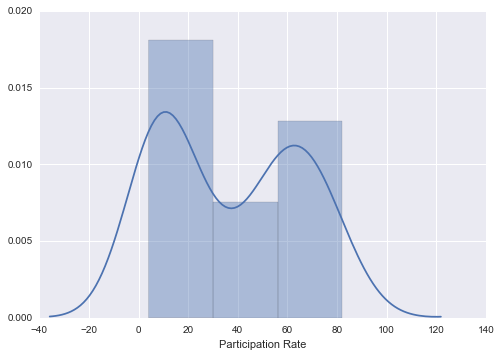

In [46]:
#Note: I am going to attempt this in seaborn first.

#I want to visualize the data - plot the distributions of each column
#Looking at a box plot
sns.set(color_codes = True)
Rate = pd.Series(sat_csv['Rate'], name = "Participation Rate")
sns.distplot(Rate)
#Will have to add title...

**15. Plot the Math distribution**

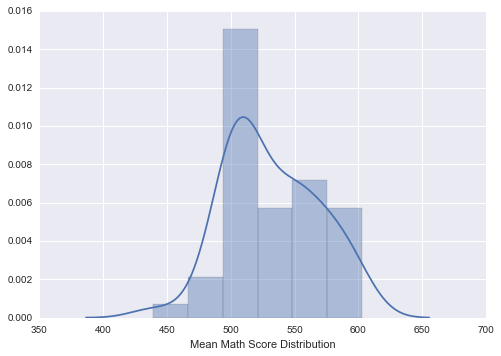

In [48]:
Math = pd.Series(sat_csv['Math'], name = "Mean Math Score Distribution")
sns.distplot(Math)


**16. Plot the Verbal distribution**

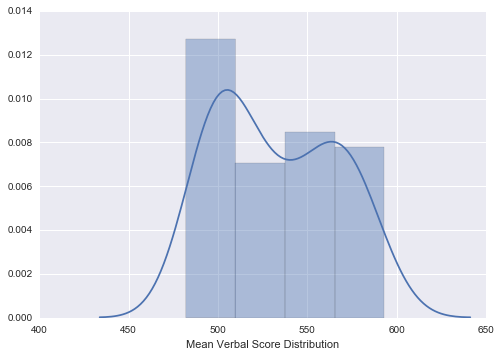

In [47]:
Verbal = pd.Series(sat_csv['Verbal'], name = "Mean Verbal Score Distribution")
sns.distplot(Verbal)



**17. What is the typical assumption for data distribution?**

We typically assume that a data distribution is normal.

**18. Does that distribution hold true for our data?**

No. The participation rate data definitely is bimodal, as is the Verbal Score distribution.

**19. Plot some scatterplots. BONUS: Use a PyPlot figure to present multiple plots at once.**

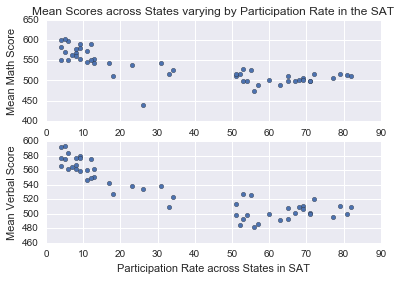

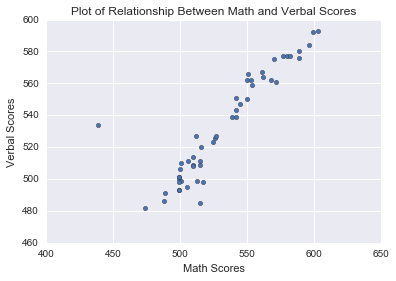

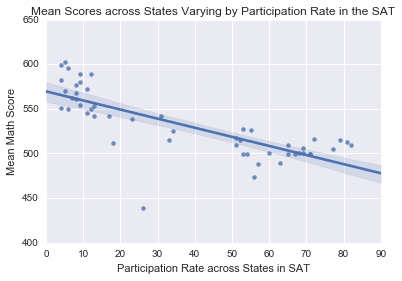

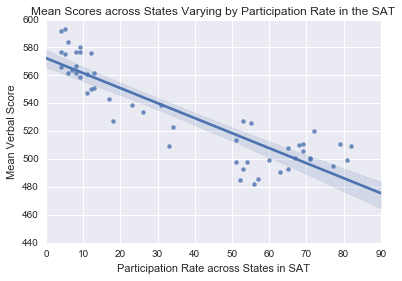

In [158]:
#Scatterplots to consider:
# 1) Participation Rate in the X axis, with Math and Verbal in the Y axes (two charts)
# 2) Is there a correlation between Math and Verbal? Maybe we'll see that by plotting one in the X and the other in the Y.
# 3) Is it worth it to artificially create groups of states by region, and see if there is a relationship?
#Try in matplotlib first?

#Plotting the Participation Rate to Math and VerbalScores.
#Having those two plots be in Figure 1.
plt.figure(1)
plt.subplot(211) #Tells plt that we have a 2 rows, 1 col for the subplot and we're using first figure (fignum.)
#Scatter plot of Rate as X and Math Scores as Y for subplot 1
plt.scatter(sat_csv['Rate'], sat_csv['Math'])
#Setting title for Figure 1.
plt.title('Mean Scores across States varying by Participation Rate in the SAT')

#Setting Y label for subplot 1.
plt.ylabel('Mean Math Score')
#second subplot for Figure 1.
plt.subplot(212) #Tells plt that we have 2 rows, 1 col for subplot, and we're using the second figure. With 2 rows and 1 col, there can only be two subplots (2 rows * 1 col = 2 spots)
plt.scatter(sat_csv['Rate'], sat_csv['Verbal'])

#Setting x label for subplot 2.
plt.xlabel('Participation Rate across States in SAT')
#Setting Y label
plt.ylabel('Mean Verbal Score')


#Plotting the relationship between Math and Verbal Scores with a Scatter plot.
plt.figure(2)
plt.scatter(sat_csv['Math'], sat_csv['Verbal'])
plt.title('Plot of Relationship Between Math and Verbal Scores')
plt.xlabel('Math Scores')
plt.ylabel('Verbal Scores')

#Plotting a linear regression with confidence intervals for Participation Rate to Math Scores, using regplot in Seaborn because it accepts numpy arrays.
plt.figure(3)
sns.regplot(x = sat_csv["Rate"], y = sat_csv["Math"], data =sat_csv)
plt.title('Mean Scores across States Varying by Participation Rate in the SAT')
plt.xlabel('Participation Rate across States in SAT')
plt.ylabel('Mean Math Score')

#Plotting a linear regression with confidence intervals for Participation Rate to Verbal Scores, using regplot in Seaborn because it accepts numpy arrays.

plt.figure(4)
sns.regplot(x = sat_csv["Rate"], y = sat_csv["Verbal"], data =sat_csv)
plt.title('Mean Scores across States Varying by Participation Rate in the SAT')
plt.xlabel('Participation Rate across States in SAT')
plt.ylabel('Mean Verbal Score')


**20. Are there any interesting relationships to note?**

There are three insights, two of which are counter-intuitive.

The first two are that as the Participation Rate increases, the mean SAT score, whether Verbal or Math, decreases. Possible explanations include low Participation Rate states being ones where the SAT is "marketed" to higher GPA, more college-ready students (or taking a college admissions test is optional, and hence there is self-selection here towards higher performing students); low Participation Rate states being where better prepared students choose the SAT over another test; and high Participation Rate states being ones where high schools require SAT participation and hence there is a wider pool of test takers, including those who are not as prepared.

The first and second hypotheses could be tested if we knew ACT scores and participation rates for those states. The third hypothesis would require examining testing policies for high partipication rate states (and seeing if they have students also take the ACT), and comparing GPA scores and distribution of them in the high Participation Rate states to low Participation Rate states.

No doubt there are other hypotheses worth testing, because needless to say, this sort of relationship should be concerning unless the College Board can use it to market to higher Participation Rate states data that helps students improve their learning outcomes and hence SAT scores.

The third insight makes sense: where students are scoring high on the Math portion of the SAT, on average, they are also scoring high on the Verbal portion.

**21. Create box plots for each variable.**

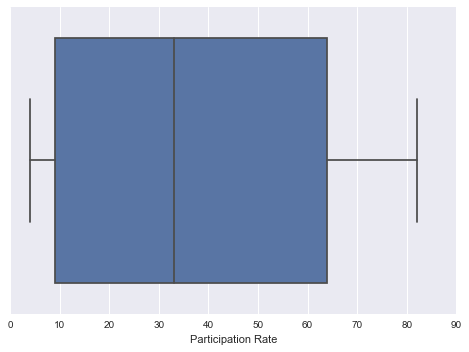

In [73]:
#Using seaborn for the boxplots.
#Boxplot of Participation Rate.
sns.set(color_codes = True)
sns.boxplot(Rate)

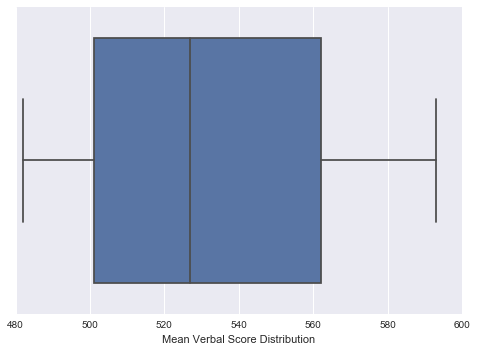

In [74]:
#Using seaborn for the boxplots.
#Boxplot of Verbal Scores.
sns.set(color_codes = True)
sns.boxplot(Verbal)

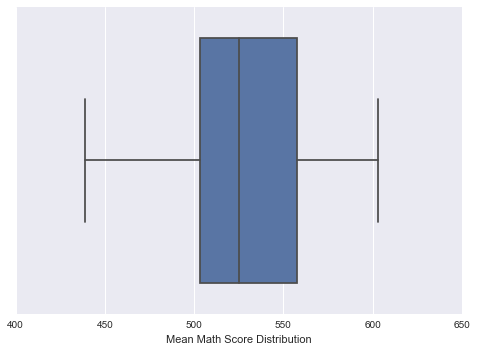

In [75]:
#Using seaborn for the boxplots.
#Boxplot of Math Scores.
sns.set(color_codes = True)
sns.boxplot(Math)

In [174]:
##Attempting to switch NE in for NB
sat_csv["State"][40] = 'NE'
#Validating the switch.
print sat_csv[40]
#Saving cleaned file
np.savetxt("sat_csv_clean.csv", sat_csv, fmt = '%.2s, %.2i, %.3i, %.3i', header = 'State, Rate, Verbal, Math', delimiter = ',')
#Note, this loses the column names when saving the file.

('NE', 8, 562, 568)


In [182]:
#Correcting index 41 in CSV to have NE instead of NB for Nebraska
sat_from_reader[41] = ['NE', '8', '562', '568']
#Verifying
print sat_from_reader[41]

#Writing to CSV file so that Tableau can read the Nebraska file for a heat map
with open ("sat_csv_test.csv", "w") as file:
    writer = csv.writer(file, delimiter = ',')
    writer.writerows(sat_from_reader)

#Validating in Python that the write was successful by reading the file.    
with open("sat_csv_test.csv", "U") as file:
    reader = csv.reader(file)
    for row in reader:
        print row

['NE', '8', '562', '568']
['State', 'Rate', 'Verbal', 'Math']
['CT', '82', '509', '510']
['NJ', '81', '499', '513']
['MA', '79', '511', '515']
['NY', '77', '495', '505']
['NH', '72', '520', '516']
['RI', '71', '501', '499']
['PA', '71', '500', '499']
['VT', '69', '511', '506']
['ME', '69', '506', '500']
['VA', '68', '510', '501']
['DE', '67', '501', '499']
['MD', '65', '508', '510']
['NC', '65', '493', '499']
['GA', '63', '491', '489']
['IN', '60', '499', '501']
['SC', '57', '486', '488']
['DC', '56', '482', '474']
['OR', '55', '526', '526']
['FL', '54', '498', '499']
['WA', '53', '527', '527']
['TX', '53', '493', '499']
['HI', '52', '485', '515']
['AK', '51', '514', '510']
['CA', '51', '498', '517']
['AZ', '34', '523', '525']
['NV', '33', '509', '515']
['CO', '31', '539', '542']
['OH', '26', '534', '439']
['MT', '23', '539', '539']
['WV', '18', '527', '512']
['ID', '17', '543', '542']
['TN', '13', '562', '553']
['NM', '13', '551', '542']
['IL', '12', '576', '589']
['KY', '12', '550', 